In [10]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


In [11]:
transform = transforms.Compose(
            [transforms.ToTensor(),         # Transforms image to tensor
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])  # Normalizes pixel values

batch_size = 50
batch_size_display = 5

# Loads CIFAR10 datasets
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_set_size = int(len(trainset + testset) * 0.6)
valid_set_size = int(len(trainset) - train_set_size)
# Cuts training set into valid and training set 
trainset, validset = torch.utils.data.random_split(trainset, [train_set_size, valid_set_size])

# Loaders to display images
trainloader_display = torch.utils.data.DataLoader(trainset, batch_size=batch_size_display, shuffle=True, num_workers=2)
testloader_display = torch.utils.data.DataLoader(testset, batch_size=batch_size_display, shuffle=False, num_workers=2)

# Loaders for training, validation and testing 
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)
validloader = torch.utils.data.DataLoader(validset, batch_size=batch_size, shuffle=False, num_workers=2)
# Classes in CIFAR10 dataset
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


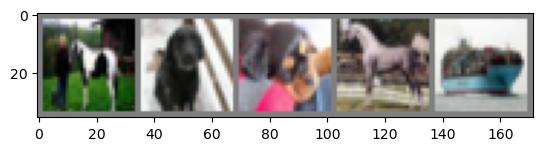

horse dog   dog   horse ship 


In [12]:
# functions to show an image
def imshow(img):            # Takes a batch of image as input
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()     # Converts image to numpy
    plt.imshow(np.transpose(npimg, (1, 2, 0))) # Converts images to correct dimensions orders
    plt.show()      # Show images

# get some random training images
dataiter = iter(trainloader_display)        # Loads data from trainloader
images, labels = next(dataiter)     # Load images from data

# show images
imshow(torchvision.utils.make_grid(images,nrow=batch_size_display))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size_display)))

In [13]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)         # Creates convolution layer where there are 3 input channels and 6 output channels with kernel size 5x5 and stride 1,1
        self.pool = nn.MaxPool2d(2, 2)          # Creates MaxPool modulation that has an area of effekt of 2x2 elements
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)   # Creates genereic linear nn layer with 16*5*5 input layers and 120 output layers
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)            

    def forward(self, x):
        x = self.pool(F.leaky_relu(self.conv1(x)))
        x = self.pool(F.leaky_relu(self.conv2(x)))
        x = torch.flatten(x, 1)                 # flatten all dimensions except batch
        x = F.leaky_relu(self.fc1(x))
        x = F.leaky_relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()                                     # Saves network in variable 'net'
criterion = nn.CrossEntropyLoss()               # Loss function
optimizer = optim.SGD(net.parameters(), lr=0.0001) # Optimizer 
epochs=10

In [14]:
training_loss=[]
validation_loss=[]
training_epoch_loss=[]
validation_epoch_loss=[]
for epoch in range(epochs):  # loop over the dataset multiple times

    # Training
    running_loss = 0.0          # Initilize total loss per epoch

    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        prediction = net(inputs)
        train_loss = criterion(prediction, labels)
        train_loss.backward()
        optimizer.step()

        training_loss.append(train_loss.item())
        # print statistics
        running_loss += train_loss.item()
        if i % 200 == 199:    # print every 100 batch, if (modulus(10) == 9) do this
            print(f'Epoch: {epoch + 1}, Batch: {i + 1:5d}] loss: {running_loss / 1000:.3f}')
            running_loss = 0.0
    training_epoch_loss.append(np.mean(training_loss)) 
    # Validation  
    net.eval()
    with torch.no_grad():    
        for i, data in enumerate(validloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data
            
            prediction = net(inputs)
            valid_loss = criterion(prediction, labels)
            validation_loss.append(train_loss.item())
            # print statistics
            #running_loss += valid_loss.item()
            #if i % 1000 == 999:    # print every 1000 mini-batches
            #    print(f'Epoch: {epoch + 1}, Batch: {i + 1:5d}] Valid loss: {running_loss / 1000:.3f}')
            #    running_loss = 0.0
    
    validation_epoch_loss.append(np.mean(validation_loss))       
            

print('Finished Training')

Epoch: 1, Batch:   200] loss: 0.461
Epoch: 1, Batch:   400] loss: 0.461
Epoch: 1, Batch:   600] loss: 0.461
Epoch: 2, Batch:   200] loss: 0.460
Epoch: 2, Batch:   400] loss: 0.461
Epoch: 2, Batch:   600] loss: 0.461
Epoch: 3, Batch:   200] loss: 0.461
Epoch: 3, Batch:   400] loss: 0.460
Epoch: 3, Batch:   600] loss: 0.461
Epoch: 4, Batch:   200] loss: 0.461
Epoch: 4, Batch:   400] loss: 0.460
Epoch: 4, Batch:   600] loss: 0.460
Epoch: 5, Batch:   200] loss: 0.461
Epoch: 5, Batch:   400] loss: 0.460
Epoch: 5, Batch:   600] loss: 0.460
Epoch: 6, Batch:   200] loss: 0.460
Epoch: 6, Batch:   400] loss: 0.460
Epoch: 6, Batch:   600] loss: 0.460
Epoch: 7, Batch:   200] loss: 0.461
Epoch: 7, Batch:   400] loss: 0.460
Epoch: 7, Batch:   600] loss: 0.460
Epoch: 8, Batch:   200] loss: 0.460
Epoch: 8, Batch:   400] loss: 0.460
Epoch: 8, Batch:   600] loss: 0.460
Epoch: 9, Batch:   200] loss: 0.460
Epoch: 9, Batch:   400] loss: 0.460
Epoch: 9, Batch:   600] loss: 0.460
Epoch: 10, Batch:   200] los

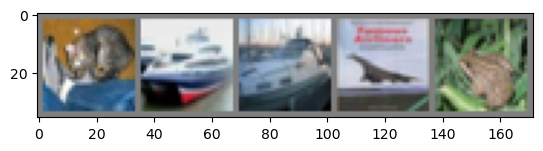

GroundTruth:  cat   ship  ship  plane frog 
Predicted:    bird  bird  bird  bird  bird 


In [15]:
dataiter = iter(testloader_display)             # Loads testset
images, labels = next(dataiter)         # Loads data from set

prediction = net(images)                # Run data through trained network
_, predicted = torch.max(prediction, 1) # Largest match value out of all classes becomes prediction

imshow(torchvision.utils.make_grid(images,nrow=batch_size_display))                                 # Prints images with 'nrow' number of images per row
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size_display)))     # Prints the labels of the images
print('Predicted:   ', ' '.join(f'{classes[predicted[j]]:5s}' for j in range(batch_size_display)))  # Prints the predictions of the images

In [16]:
# Accuracy calculations 
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:         # For all data in testset
        images, labels = data       # Get all images and labels 
        
        prediction = net(images)    # Make predictions
       
        _, predicted = torch.max(prediction.data, 1)    # Collaps to only one prediction
        total += labels.size(0)                         # Total number of labels to make predictions on
        correct += (predicted == labels).sum().item()   # Number of correct guesses

print(f'Accuracy of the network on the test images: {100 * correct // total} %')  # Print accuracy

Accuracy of the network on the test images: 10 %


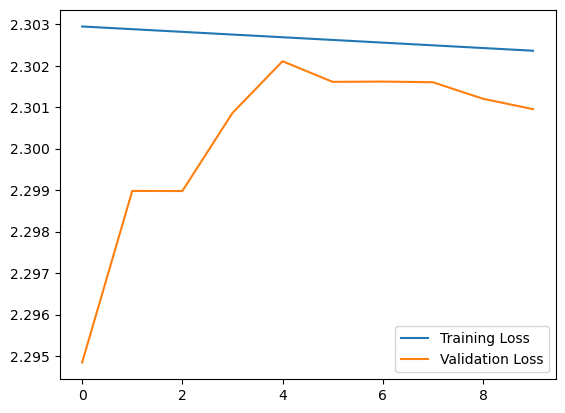

In [17]:
#fig, axs = plt.subplots(2)
#plt.figure(figsize=(5,5))
#fig.suptitle('Vertically stacked subplots')
plt.plot(training_epoch_loss,label='Training Loss')
plt.plot(validation_epoch_loss,label='Validation Loss')
plt.legend()

In [18]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        prediction = net(images)
        _, predictions = torch.max(prediction, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 1.1 %
Accuracy for class: car   is 0.0 %
Accuracy for class: bird  is 99.5 %
Accuracy for class: cat   is 0.0 %
Accuracy for class: deer  is 0.0 %
Accuracy for class: dog   is 0.0 %
Accuracy for class: frog  is 0.0 %
Accuracy for class: horse is 0.0 %
Accuracy for class: ship  is 0.0 %
Accuracy for class: truck is 0.0 %
